In [1]:
from datasets import load_dataset, load_from_disk, Dataset, DatasetDict, concatenate_datasets
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance


import json
import matplotlib.pyplot as plt

In [2]:
# label: true = 0, fake = 1

In [3]:
experiment_name = "mistral_10k"
fake_train_dataset = load_from_disk(f"fake_true_datasets/fake_true_dataset_{experiment_name}")

In [61]:
# save to json
#fake_train_dataset["train"].to_json("fake_true_dataset.json", force_ascii=True)

# load to pandas
df = pd.DataFrame(fake_train_dataset['train'])

# transform text to list by splitting on \n
df["text"] = df["text"].apply(lambda x: x.split("\n"))

# dump to json
df.to_json(f"fake_true_dataset_{experiment_name}.json", force_ascii=False, indent=4)



In [62]:
fake_train_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 13232
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 1653
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1653
    })
})

In [63]:
fake_train_dataset['train'][0]

{'text': 'Former Vice President Dick Cheney on Sunday defended the Bush administration\'s economic record, the invasion of Iraq and the treatment of suspected terrorists, warning that reversing its anti-terrorism policies endangers Americans. "We\'ve accomplished nearly everything we set out to do," ex-Vice President Dick Cheney says Sunday about Iraq. In a wide-ranging interview with CNN\'s "State of the Union," Cheney said the harsh interrogations of suspects and the use of warrantless electronic surveilla',
 'label': 0}

In [64]:
print(fake_train_dataset['train'][0]['text'])

Former Vice President Dick Cheney on Sunday defended the Bush administration's economic record, the invasion of Iraq and the treatment of suspected terrorists, warning that reversing its anti-terrorism policies endangers Americans. "We've accomplished nearly everything we set out to do," ex-Vice President Dick Cheney says Sunday about Iraq. In a wide-ranging interview with CNN's "State of the Union," Cheney said the harsh interrogations of suspects and the use of warrantless electronic surveilla


In [65]:
fake_train_dataset['train'][2]

{'text': 'Space shuttle Discovery launched just before midnight Friday on a mission to the international space station. Space shuttle Discovery lifts off late Friday from Kennedy Space Center in a photo from iReporter Alan Walters. The crew of seven astronauts includes one from Mexico and another from Sweden. One of those seven, Nicole Stott, will remain on the station as a flight engineer, while astronaut Timothy Kopra is to return home aboard the shuttle. Also on board: The Leonardo logistics module, sc',
 'label': 0}

In [66]:
print(fake_train_dataset['train'][2]["text"])

Space shuttle Discovery launched just before midnight Friday on a mission to the international space station. Space shuttle Discovery lifts off late Friday from Kennedy Space Center in a photo from iReporter Alan Walters. The crew of seven astronauts includes one from Mexico and another from Sweden. One of those seven, Nicole Stott, will remain on the station as a flight engineer, while astronaut Timothy Kopra is to return home aboard the shuttle. Also on board: The Leonardo logistics module, sc


In [85]:
# transform dataset to pandas dataframe
fake_train_df = pd.DataFrame(fake_train_dataset['train'])
fake_test_df = pd.DataFrame(fake_train_dataset['test'])
fake_valid_df = pd.DataFrame(fake_train_dataset['valid'])
fake_train_df.head()

,text,label
0,Former Vice President Dick Cheney on Sunday de...,0
1,Former Vice President Dick Cheney on Sunday de...,1
2,Space shuttle Discovery launched just before m...,0
3,Space shuttle Discovery launched just before m...,1
4,When Eileen Mather lands in Mexico City on her...,0


In [68]:
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)))

Average size of text with label 0 (=True text): 500.0
Average size of text with label 1 (=Fake text): 500.0


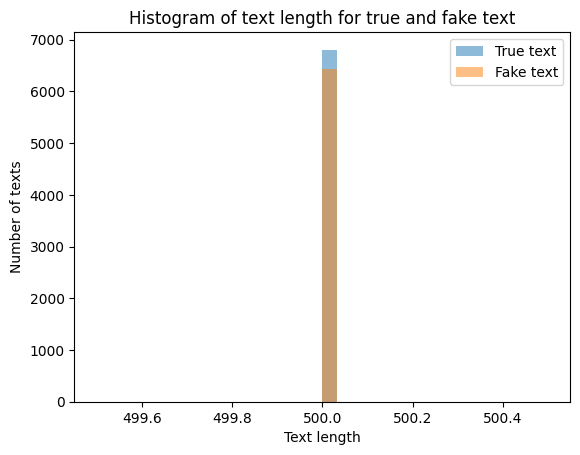

In [69]:
# show histogram of text length for true and fake text
plt.hist(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len), bins=30, alpha=0.5, label='True text')
plt.hist(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len), bins=30, alpha=0.5, label='Fake text')

# add x and y axis labels
plt.xlabel('Text length')
plt.ylabel('Number of texts')

plt.title("Histogram of text length for true and fake text")

plt.legend(loc='upper right')

In [70]:
print("Average number of newlines in text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(lambda x: x.count("\n"))))
print("Average number of newlines in text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(lambda x: x.count("\n"))))

Average number of newlines in text with label 0 (=True text): 0.0
Average number of newlines in text with label 1 (=Fake text): 0.0


In [71]:
fake_train_df.describe()

,label
count,13232.000000
mean,0.485565
std,0.499810
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [72]:
fake_train_df[fake_train_df["label"] == 1].describe()

,label
count,6425.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [73]:
fake_train_df.head(20)

,text,label
0,Former Vice President Dick Cheney on Sunday de...,0
1,Former Vice President Dick Cheney on Sunday de...,1
2,Space shuttle Discovery launched just before m...,0
3,Space shuttle Discovery launched just before m...,1
4,When Eileen Mather lands in Mexico City on her...,0
5,Zimbabwean lawmakers on Monday narrowly voted ...,0
6,Zimbabwean lawmakers on Monday narrowly voted ...,1
7,Former detainees of Immigration and Customs En...,0
8,Former detainees of Immigration and Customs En...,1
9,A memorial cruise is scheduled to set sail 100...,0


In [74]:
# filter out texts with length greater than 1000
fake_train_df_filtered = fake_train_df[fake_train_df["text"].apply(len) < 1000]
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 1]['text'].apply(len)))


Average size of text with label 0 (=True text): 500.0
Average size of text with label 1 (=Fake text): 500.0


In [75]:
# compute wasserstein distance between true and fake text lengths
true_text_lengths = fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)
fake_text_lengths = fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)

wasserstein_distance(true_text_lengths, fake_text_lengths)


0.0

In [76]:
test_text = "This a test text. It is not very long. It is just a test."

" ".join(test_text.split()[:10])

'This a test text. It is not very long. It'

# Test set

In [77]:
fake_train_dataset["train"][2:6]

{'text': ['Space shuttle Discovery launched just before midnight Friday on a mission to the international space station. Space shuttle Discovery lifts off late Friday from Kennedy Space Center in a photo from iReporter Alan Walters. The crew of seven astronauts includes one from Mexico and another from Sweden. One of those seven, Nicole Stott, will remain on the station as a flight engineer, while astronaut Timothy Kopra is to return home aboard the shuttle. Also on board: The Leonardo logistics module, sc',
  'Space shuttle Discovery launched just before midnight Friday on a missing Malaysian jet has been widened, with the focus now on the southern Indian Ocean. The Australian Maritime Safety Authority said on Tuesday it had been notified of a “number of possible satellite sightings” of floating objects by a French satellite. “These objects are within the area being searched by the Australian Maritime Safety Authority, but they are not consistent with the two objects previously report

In [78]:
fake_test_df = pd.read_json("fake_true_dataset_mistral_10k_test.json")
fake_test_df.head()

,text,label
0,[A former astronaut who was accused of assault...,0
1,[A former astronaut who was accused of assault...,1
2,[Misdemeanor assault charges have been dropped...,0
3,[Misdemeanor assault charges have been dropped...,1
4,"[Six men, including a police officer, are faci...",0


In [79]:
fake_test_df = pd.DataFrame(fake_train_dataset['test'])
fake_test_df.head(10)

,text,label
0,A former astronaut who was accused of assaulti...,0
1,A former astronaut who was accused of assaulti...,1
2,Misdemeanor assault charges have been dropped ...,0
3,Misdemeanor assault charges have been dropped ...,1
4,"Six men, including a police officer, are facin...",0
5,"Six men, including a police officer, are facin...",1
6,British boxer Amir Khan has retained his WBA l...,0
7,British boxer Amir Khan has retained his WBA l...,1
8,"How are the elements of the charming, traditio...",0
9,"How are the elements of the charming, traditio...",1


In [80]:
fake_test_df["text"][2]

'Misdemeanor assault charges have been dropped against "24" star Kiefer Sutherland in a head-butting incident at a New York City nightclub, according to Alicia Maxey Greene, spokeswoman for the Manhattan District Attorney\'s office. Kiefer Sutherland turns himself in to the NYPD on May 7. Charges against him have been dropped. "We decided to drop the charge after a full investigation, including after speaking to a complaining witness, who was uncooperative," Greene told CNN Tuesday. The charges st'

In [81]:
fake_test_df["text"].unique().shape

(1653,)

In [82]:
#num_rows: 13377
fake_train_df["text"].unique().shape

(13232,)

In [86]:
# number of samples with label 0 and label 1 in the training dataset and the test dataset
print("Number of samples with label 0 in the training dataset:", fake_train_df[fake_train_df["label"] == 0].shape[0])
print("Number of samples with label 1 in the training dataset:", fake_train_df[fake_train_df["label"] == 1].shape[0])

print("Number of samples with label 0 in the test dataset:", fake_test_df[fake_test_df["label"] == 0].shape[0])
print("Number of samples with label 1 in the test dataset:", fake_test_df[fake_test_df["label"] == 1].shape[0])

print("Number of samples with label 0 in the validation dataset:", fake_valid_df[fake_valid_df["label"] == 0].shape[0])
print("Number of samples with label 1 in the validation dataset:", fake_valid_df[fake_valid_df["label"] == 1].shape[0])

Number of samples with label 0 in the training dataset: 6807
Number of samples with label 1 in the training dataset: 6425
Number of samples with label 0 in the test dataset: 857
Number of samples with label 1 in the test dataset: 796
Number of samples with label 0 in the validation dataset: 858
Number of samples with label 1 in the validation dataset: 795


In [30]:
# mix multiple datasets
dataset_1 = load_from_disk("fake_true_datasets/fake_true_dataset_mistral_10k")["train"]
dataset_2 = load_from_disk("fake_true_datasets/fake_true_dataset_gpt2_10k")["train"]

In [31]:
dataset_1

Dataset({
    features: ['text', 'label'],
    num_rows: 14870
})

In [32]:
list(dataset_1)

[{'text': 'Four groups that advocate for immigrant rights said Thursday they will challenge Arizona\'s new immigration law, which allows police to ask anyone for proof of legal U.S. residency. The Mexican American Legal Defense and Educational Fund, the American Civil Liberties Union, the ACLU of Arizona and the National Immigration Law Center held a news conference Thursday in Phoenix to announce the legal challenge. "The Arizona community can be assured that a vigorous and sophisticated legal challenge wi',
  'label': 0},
 {'text': "Four groups that advocate for immigrant rights said Thursday they will fight to prevent a new law from being enacted. (Published Wednesday, June 18th 2017) — A group of four activists is asking the Supreme Court in an appeal filed on behalf and against one other court case involving undocumented immigrants who have been denied visas because their families are U-Hauled at home or if there's no way around it: The Immigrant Law Enforcement Coalition has requ

In [33]:
list(dataset_2)

[{'text': '"Why do only rich kids get good schools?" I was asked this question by a fellow who has been to many of the best public school systems in America. "How does it feel for poor students? If you are lucky, then there is always going be one or two other children that don\'t know how they can succeed academically," he told me after we had spent some time together at his home and talked about what life on campus would look like if all those bright young people got their hands dirty with every opportunit',
  'label': 1},
 {'text': '"Why do only rich kids get good schools?" I was the founder and director of a part-time out-of-school college preparatory program. The questioner was a parent; herself a victim of a dulled urban education. The statement was more of an indictment than question, and I had no answer. "Well, why can\'t this program be a school," she offered. The program sent 100 percent of our graduates to college. We served poor students who were the first generation in thei

In [48]:
import random
random.seed(42)

dataset_1 = list(dataset_1)[:-1]
full_list = dataset_1 + list(dataset_2)
full_list_split = [elem["text"].split()[:10] for elem in full_list]
list_pairs = []
#for i in range(0, len(full_list), 2):
#    pair = (full_list[i], full_list[i+1])
#    list_pairs.append(pair)

# create pairs
for i in range(len(full_list)):
    pair_i_text = full_list_split[i]
    for j in range(i+1, len(full_list)):
        pair_j_text = full_list_split[j]
        if pair_i_text == pair_j_text:
            pair = (full_list[i], full_list[j])
            list_pairs.append(pair)

"""
# verify that the pairs are correct
nb_not_correct = 0
list_incorrect = []
for i in range(len(list_pairs)):
    pair_1_text = list_pairs[i][0]["text"]
    pair_2_text = list_pairs[i][1]["text"]

    if pair_1_text.spli()[:10] != pair_2_text.split()[:10]:
        nb_not_correct += 1
        list_incorrect.append(i)
"""
random.shuffle(list_pairs)

# actually we don't really care about shuffling the pairs because there should be more than 1 fake continuation per prefix

0

In [39]:
list_pairs

[({'text': 'Authorities cordoned off the home of missing toddler Caylee Anthony\'s grandparents on Thursday, hours after the remains of a small child were found nearby. Investigators have sealed off the Anthony home, which shows a large Caylee poster. The sheriff\'s office in Orange County, Florida, said it is seeking a warrant to search the home of George and Cindy Anthony. Sheriff Kevin Beary said the home has been secured "pending more investigation." The house has the "possibility of being more of a crime',
   'label': 0},
  {'text': 'Authorities have arrested a U.S. sailor on suspicion of robbery and murder in the death of a Japanese taxi driver. The U.S. military handed him over Thursday at Yokosuka Naval Base, south of Tokyo. A Yokosuka police spokesman identified the sailor as Olatunbosun Ogbogu, a 22-year-old Nigerian national. Taxi driver Masaaki Takahashi, 61, was found dead March 19 of stab wounds to the neck about a mile from the base in Yokosuka. The presence of U.S. in J

In [50]:
experiment_name = "round_robin"
fake_train_dataset = load_from_disk(f"fake_true_datasets/fake_true_dataset_{experiment_name}")

# load to pandas
df = pd.DataFrame(fake_train_dataset['train'])

# transform text to list by splitting on \n
df["text"] = df["text"].apply(lambda x: x.split("\n"))

# dump to json
df.to_json(f"fake_true_datasets/fake_true_dataset_{experiment_name}.json", force_ascii=False, indent=4)